In [74]:
# import the keras libraries and packages
from keras.models import Sequential 
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import matplotlib.pyplot as plt
%matplotlib inline

# Build the model

In [75]:
model = Sequential()
model.add(Convolution2D(32,(3,3), input_shape=(64,64,3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(activation="relu", units=128))
model.add(Dense(units = 4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               3936384   
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 516       
Total params: 3,937,796
Trainable params: 3,937,796
Non-trainable params: 0
_________________________________________________________________


# Fit the datasets

In [76]:
from keras.preprocessing.image import ImageDataGenerator

In [77]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [78]:
training_set = train_datagen.flow_from_directory('datasets/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 8,
                                                 class_mode = 'categorical',
                                                 save_to_dir = 'datasets/augments/')

test_set = test_datagen.flow_from_directory('datasets/test_set',
                                            target_size = (64, 64),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 93 images belonging to 4 classes.
Found 21 images belonging to 4 classes.


In [73]:
training_set

In [79]:
model.fit_generator(training_set,
                    steps_per_epoch = 93,
                    epochs = 3,
                    validation_data = test_set,
                    validation_steps = 21)

Epoch 1/3
93/93 [==============================] - 196s - loss: 1.3830 - acc: 0.5578 - val_loss: 0.5603 - val_acc: 0.9524
Epoch 2/3
93/93 [==============================] - 182s - loss: 0.3819 - acc: 0.9538 - val_loss: 0.1744 - val_acc: 1.0000
Epoch 3/3
93/93 [==============================] - 190s - loss: 0.0992 - acc: 0.9946 - val_loss: 0.1557 - val_acc: 0.9116


In [81]:
training_set.image_shape

(64, 64, 3)

In [82]:
training_set.class_indices

{'cop': 0, 'dop': 1, 'rop': 2, 'xop': 3}

In [83]:
training_set.samples

93

In [84]:
training_set.save_to_dir

'datasets/augments/'

In [80]:
model.save('./CNN_handguesture.h5')

# Predict

In [ ]:
from keras.models import load_model

In [ ]:
my_model = load_model('./CNN_handguesture.h5')

In [85]:
import numpy as np
from keras.preprocessing import image

In [115]:
test_image = image.load_img('datasets/predict/IMG_5025.JPG', target_size=(64,64))

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

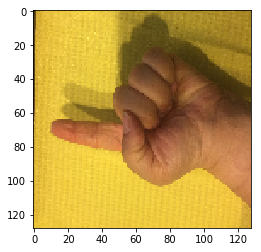

In [112]:
plt.imshow(test_image)
plt.show()

In [ ]:
test_image = image.img_to_array(test_image)

In [99]:
test_image.shape

(64, 64, 3)

In [113]:
test_image = np.expand_dims(test_image,axis = 0)

In [101]:
test_image.shape

(1, 64, 64, 3)

In [114]:
result = my_model.predict(test_image)

ValueError: Error when checking : expected conv2d_4_input to have shape (None, 64, 64, 3) but got array with shape (1, 128, 128, 3)

In [110]:
result.shape

(1, 4)

In [ ]:
training_set.class_indices